In [1]:
#Benchmark                        Mode  Cnt          Score          Error  Units
#Counter.getValue                thrpt    3   57086263.523 ±  4319590.349  ops/s
#Counter.increment               thrpt    3       1728.904 ±     2797.409  ops/s
#CounterLock.inc                 thrpt    3       2527.789 ±     5598.678  ops/s
#CounterReentrantLock.getValue   thrpt    3   53507244.753 ± 32129656.824  ops/s
#CounterReentrantLock.increment  thrpt    3       2475.183 ±     5270.441  ops/s
#NonblockingCounter.getValue     thrpt    3  279898336.949 ± 60641533.357  ops/s
#NonblockingCounter.increment    thrpt    3       2570.333 ±     5966.660  ops/s

In [62]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [63]:
# Import Data
df_read = pd.read_csv("scoresReadCounter.csv")
df_read

,Benchmark,Mode,Cnt,Score,Units
0,Counter.getValue,thrpt,3,5.708626e+07,ops/s
1,CounterReentrantLock.getValue,thrpt,3,5.350724e+07,ops/s
2,NonblockingCounter.getValue,thrpt,3,2.798983e+08,ops/s


In [64]:
# Import Data
df_write = pd.read_csv("scoresCounterWrite.csv")
df_write

,Benchmark,Mode,Cnt,Score,Units
0,Counter.increment,thrpt,3,1728.904,ops/s
1,CounterLock.inc,thrpt,3,2527.789,ops/s
2,CounterReentrantLock.increment,thrpt,3,2475.183,ops/s
3,NonblockingCounter.increment,thrpt,3,2570.333,ops/s


In [65]:
df_read['Benchmark'][0]

'Counter.getValue'

In [66]:
df_read['Benchmark'][0] = 'Counter'
df_read['Benchmark'][1] = 'CounterReentrantLock'
df_read['Benchmark'][2] = 'NonblockingCounter'

<ipython-input-66-fa35f945b814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read['Benchmark'][0] = 'Counter'


In [67]:
df_read

,Benchmark,Mode,Cnt,Score,Units
0,Counter,thrpt,3,5.708626e+07,ops/s
1,CounterReentrantLock,thrpt,3,5.350724e+07,ops/s
2,NonblockingCounter,thrpt,3,2.798983e+08,ops/s


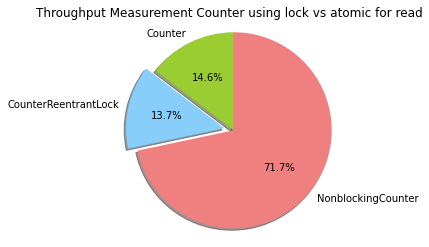

In [68]:
labels = df_read['Benchmark']
sizes = df_read['Score']
colors = ['yellowgreen','lightskyblue', 'lightcoral']
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Throughput Measurement Counter using lock vs atomic for read')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [69]:
df_write['Benchmark'][0] = 'Counter'
df_write['Benchmark'][1] = 'CounterLock'
df_write['Benchmark'][2] = 'CounterReentrantLock'
df_write['Benchmark'][3] = 'NonblockingCounter'

<ipython-input-69-48e294492eda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_write['Benchmark'][0] = 'Counter'


In [70]:
df_write

,Benchmark,Mode,Cnt,Score,Units
0,Counter,thrpt,3,1728.904,ops/s
1,CounterLock,thrpt,3,2527.789,ops/s
2,CounterReentrantLock,thrpt,3,2475.183,ops/s
3,NonblockingCounter,thrpt,3,2570.333,ops/s


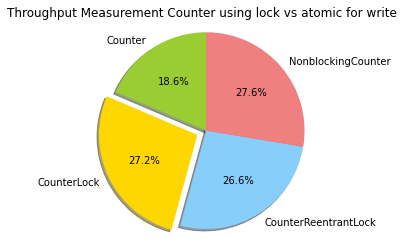

In [71]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_write['Benchmark']
sizes = df_write['Score']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Throughput Measurement Counter using lock vs atomic for write')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()